In [153]:
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [154]:
POP_SIZE = 100
N_MATING = 3
N_OFFSPRING = 3
IDX_CROSSOVER = 0

curr_population = np.random.uniform(-10,10,POP_SIZE)

In [155]:
def calc_fitness(t_pop):
    fitness = -10*(t_pop)**2
    return fitness

In [156]:
def select_determinstic(t_pop, t_fitness):
    idx = np.argsort(t_fitness)
    idx = idx[::-1]
    parents = t_pop[idx]
    parents = parents[:N_MATING]
    return (parents, calc_fitness(parents))

In [157]:
def select_stochastic(t_pop, t_fitness):
    idx = np.argsort(t_fitness)
    r_i = np.empty_like(idx)
    r_i[idx] = np.arange(len(t_fitness))
    p_i = r_i + 2
    sum_pi = np.sum(p_i)
    q_i = p_i / sum_pi
    q_idx = np.argsort(q_i)

    q_i = q_i[q_idx]
    q_i = q_i[::-1]

    random_increment = 1./N_MATING

    random_val = np.random.rand(1, )

    arrow_locations = random_val + random_increment * np.arange(N_MATING)

    arrow_locations %= 1
    
    arrow_locations.sort()

    cum_qi = np.cumsum(q_i)
    
    zone_belong = np.searchsorted(cum_qi, arrow_locations)
    
    zone_belong = POP_SIZE - zone_belong - 1
    
    parents = t_pop[q_idx][zone_belong]
    par_fitness = t_fitness[q_idx][zone_belong]

    return (parents, par_fitness)

In [158]:
def crossover(t_parents):
    return (t_parents,calc_fitness(t_parents))

In [159]:
PM = 0.5
def mutation(t_offspring):
    random_mutator = np.random.uniform(0.0, 1.0, (N_OFFSPRING,))

    idx = random_mutator > PM

    nnz = np.count_nonzero(idx)

    mutated_offspring = t_offspring.copy()

    mutated_offspring[idx] += np.random.uniform(-0.5, 0.5)
    
    return (mutated_offspring, calc_fitness(mutated_offspring))

In [160]:
def hard_constraint(t_total_pop):
    return t_total_pop

In [161]:
def environmental_selection(t_total_pop):
    tot_fitness = calc_fitness(t_total_pop)
    idx = np.argsort(tot_fitness)
    idx = idx[::-1]
    idx = idx[:POP_SIZE]
    return t_total_pop[idx]

In [162]:
best_outputs = []
num_generations = 1000
curr_population = np.random.uniform(-99,99,POP_SIZE)
overall_max_fitness = -99999

for generation in range(num_generations):
    print("Generation : ", generation)

    fitness = calc_fitness(curr_population)

    max_fitness = np.max(fitness)

    print("Best result in current iteration {0} compared to overall {1}".format(max_fitness, max(max_fitness, overall_max_fitness)))
    best_outputs.append(max_fitness)
    
    parents, _ = select_determinstic(curr_population, fitness)

    offspring_crossed, _ = crossover(parents)

    offspring_mutated, _ = mutation(offspring_crossed)

    total_population = np.append(curr_population, offspring_mutated)
    total_population = hard_constraint(total_population)

    curr_population = environmental_selection(total_population)
    
    fitness = calc_fitness(curr_population)
    max_idx = np.argmax(fitness)
    print(curr_population[max_idx])
              
fitness = calc_fitness(curr_population)

max_idx = np.argmax(fitness)

print("Best solution : ", curr_population[max_idx])
print("Best solution fitness : ", fitness[max_idx])

Generation :  0
Best result in current iteration -22.052850669468032 compared to overall -22.052850669468032
1.4850202244234936
Generation :  1
Best result in current iteration -22.052850669468032 compared to overall -22.052850669468032
-1.3500729307515384
Generation :  2
Best result in current iteration -18.226969183480485 compared to overall -18.226969183480485
1.3449909044304444
Generation :  3
Best result in current iteration -18.09000533000625 compared to overall -18.09000533000625
1.0171574051529162
Generation :  4
Best result in current iteration -10.346091868574137 compared to overall -10.346091868574137
1.0171574051529162
Generation :  5
Best result in current iteration -10.346091868574137 compared to overall -10.346091868574137
0.8381430777631411
Generation :  6
Best result in current iteration -7.024838188022708 compared to overall -7.024838188022708
0.8381430777631411
Generation :  7
Best result in current iteration -7.024838188022708 compared to overall -7.024838188022708


<Figure size 864x864 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Fitness')

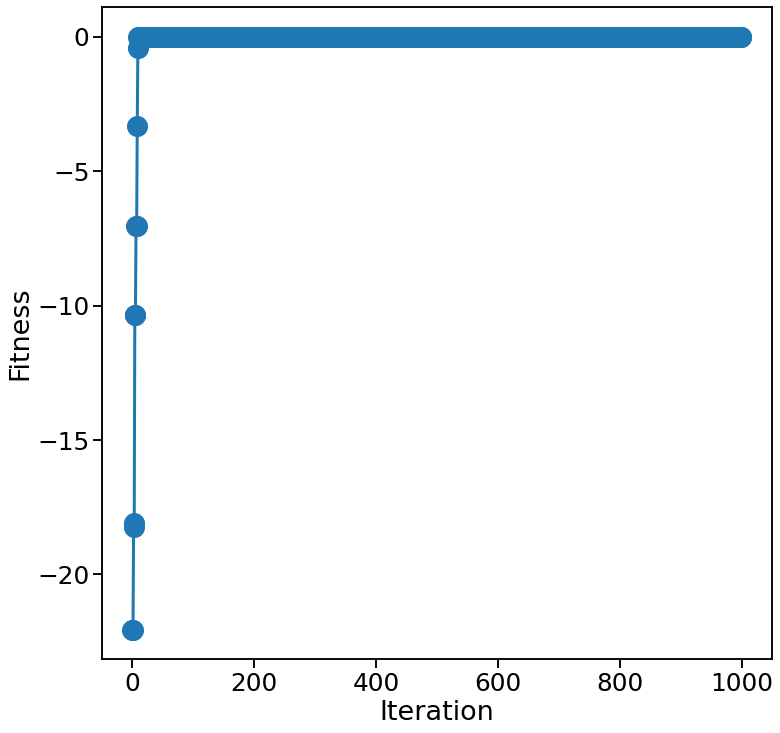

In [163]:
import pylab as plt
import seaborn as sns
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

%matplotlib inline
plt.figure(figsize=(12,12))
plt.plot(best_outputs,'-o', lw=3, ms=20, label='from scratch')
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()

<Figure size 864x864 with 0 Axes>

Text(0.5, 0, 'Iteration')

Text(0, 0.5, 'Fitness')

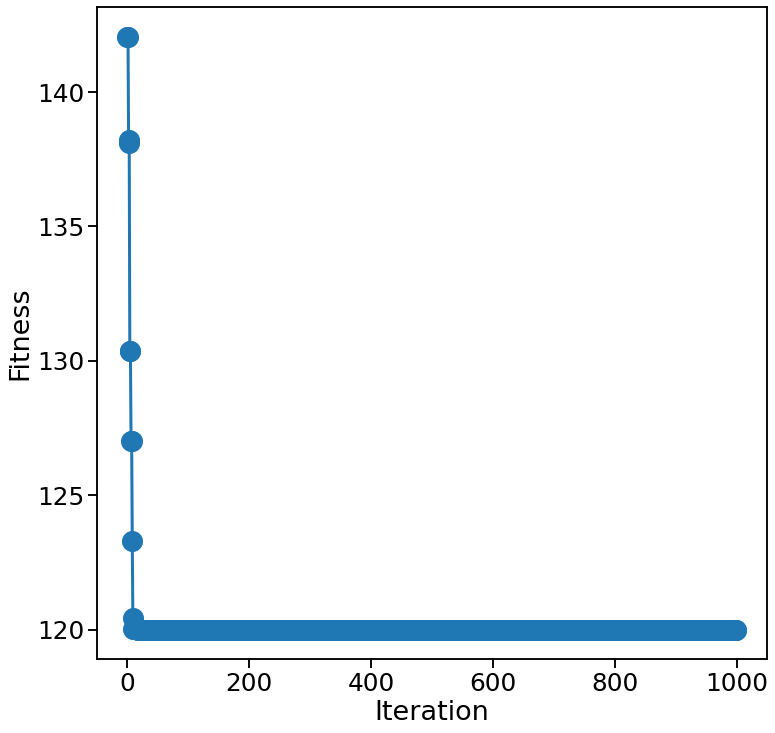

In [164]:
%matplotlib inline
plt.figure(figsize=(12,12))
plt.plot(120-np.array(best_outputs),'-o', lw=3, ms=20, label='from scratch')
plt.xlabel("Iteration")
plt.ylabel("Fitness")
plt.show()